# Proyecto 02 Accidentes aereos 


## EDA

In [1]:
# importo librerias
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# leo el dataset
df_acc = pd.read_csv('AccidentesAviones.csv')

In [3]:
df_acc.head(3)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...


 - Verifico tipo de datos y nulos 

In [4]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

* Cambio la columna fecha a un formato de fecha

In [3]:
df_acc['fecha'] = pd.to_datetime(df_acc['fecha'], format='%B %d, %Y')

In [8]:
# verifico  
df_acc.fecha.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5008 entries, 0 to 5007
Series name: fecha
Non-Null Count  Dtype         
--------------  -----         
5008 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 39.2 KB


* Quito los datos de aviones militares  / que no son relevantes para este analisis de aviacion civil 

In [4]:
df_acc_civiles = df_acc[~df_acc['OperadOR'].str.contains('Military')]

* Transformacionde datos a tipo hora  

In [5]:
# remplaso los ? por 0000
df_acc_civiles['HORA declarada'] = df_acc_civiles['HORA declarada'].replace('?','0000')

df_acc_civiles['HORA declarada'] = df_acc_civiles['HORA declarada'].str.replace('c','')
df_acc_civiles['HORA declarada'] = df_acc_civiles['HORA declarada'].str.replace('Z','')
df_acc_civiles['HORA declarada'] = df_acc_civiles['HORA declarada'].str.replace(':','')
df_acc_civiles['HORA declarada'] = df_acc_civiles['HORA declarada'].str.replace(';','')

In [6]:
# eliminar espacios delanteros y finales con el metodo strip()
df_acc_civiles['HORA declarada'] = df_acc_civiles['HORA declarada'].str.strip()

In [7]:
df_acc_civiles['HORA declarada'] = pd.to_datetime(df_acc_civiles['HORA declarada'], format='%H%M').dt.strftime('%H:%M')

In [13]:
# verifico
df_acc_civiles.tail(3)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
5002,5002,2021-03-02,17:05,"Pieri, Sudan",South Sudan Supreme Airlines,?,Pieri - Yuai,Let L-410UVP-E,HK-4274,902525,10,8,2,10,8,2,0,One of the engines on the aircraft failed 10 m...
5003,5003,2021-03-28,18:35,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5007,5007,2021-07-06,15:00,"Palana, Russia",Kamchatka Aviation Enterprise,251,Petropavlovsk - Palana,Antonov An 26B-100,RA-26085,12310,28,22,6,28,22,6,0,The passenger plane crashed into the top of a ...


* creo una columna year con el dato de año

In [8]:
df_acc_civiles['_year'] = df_acc_civiles['fecha'].dt.year

In [15]:
# verifico 
df_acc_civiles.head(3)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,_year
1,1,1909-09-07,00:00,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909
3,3,1913-08-06,00:00,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,1913
17,17,1917-06-17,00:00,"Near Yarmouth, England",?,?,?,Zepplin L-48 (air ship),L-48,?,16,?,?,14,?,?,0,Shot down by aircraft.,1917


* Cantidad de Acidentes por año Historico 

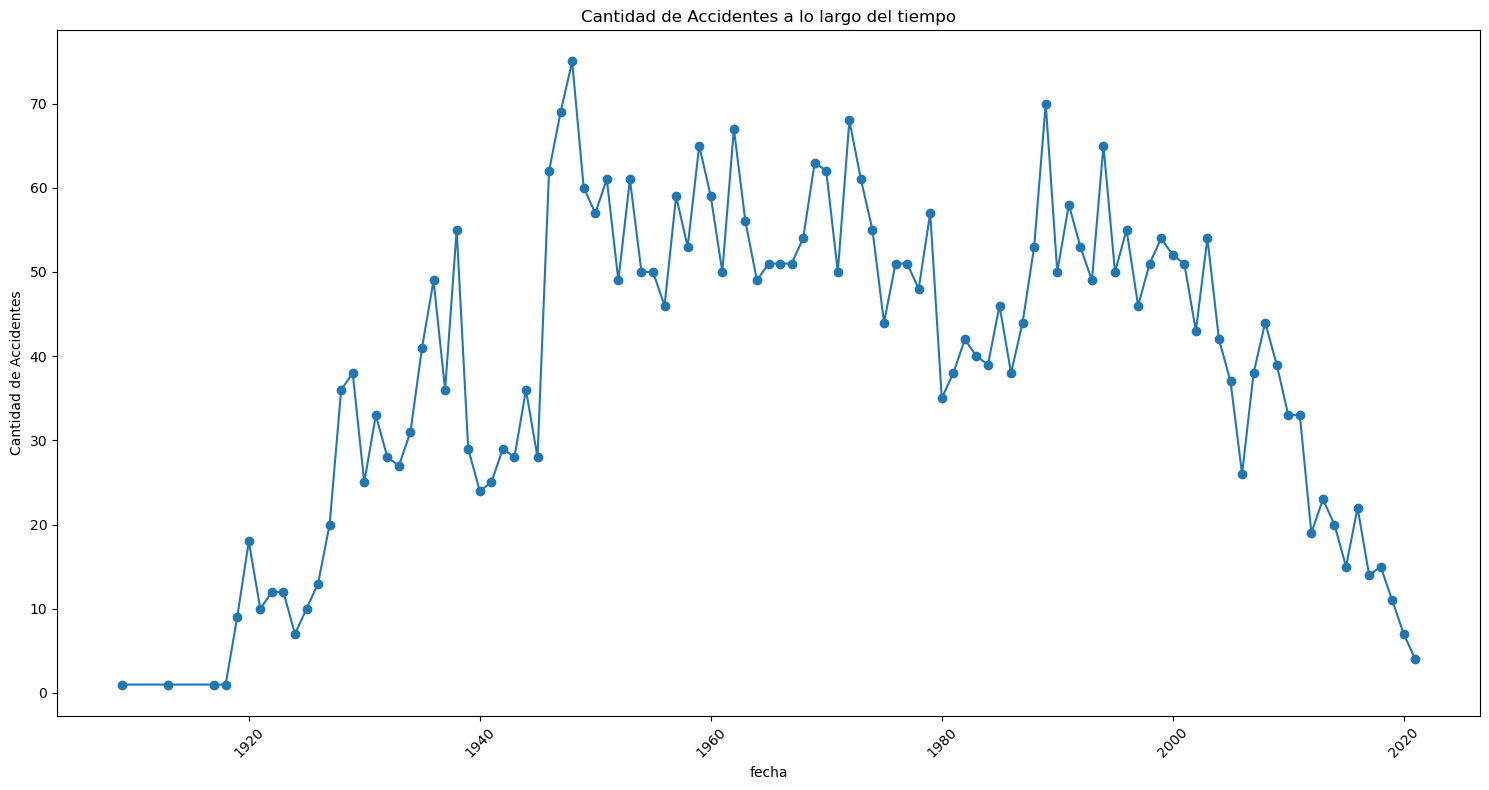

In [9]:
accidentes_por_fecha = df_acc_civiles.groupby('_year').size()

fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(accidentes_por_fecha.index, accidentes_por_fecha, '-o')
plt.xlabel('fecha')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes a lo largo del tiempo')

plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

## filas con data faltantes

In [10]:
df_acc_civiles[df_acc_civiles['cantidad de fallecidos'] == '?']

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,_year
103,103,1925-09-07,00:00,"Toul, France",CIDNA,?,?,Spad 33,?,?,?,?,?,?,?,?,?,?,1925
347,347,1934-08-10,00:00,"Ningbo, China",China National Aviation Corporation,?,?,Sikorsky S-38B,?,?,?,?,?,?,?,?,?,?,1934
384,384,1935-08-13,00:00,"Hangow, China",China National Aviation Corporation,?,?,Sikorsky S-38B,NV40V,?,?,?,?,?,?,?,?,Destoryed in a storm.,1935
451,451,1936-12-26,00:00,"Nanking, China",China National Aviation Corporation,?,?,Douglas DC-2,NC14269,?,?,?,?,?,?,?,?,?,1936
652,652,1942-10-01,00:00,"Kunming, China",China National Aviation Corporation,?,?,Douglas C-47,69,?,?,?,?,?,?,?,?,Crashed while attempting to land after losing ...,1942
854,854,1946-03-18,00:00,"Between Chungking and Shanghai, China",China National Aviation Corporation,?,Chunking - Shanghai,?,139,?,?,?,?,?,?,?,?,Disappeared while en route. Plane never located.,1946
1451,1451,1954-03-13,00:00,"Dien Bien Phu, South Vietnam",Aigle Azur,?,?,C-46,?,?,?,?,?,?,?,?,?,Shot down.,1954


In [11]:
# borro filas 
df_acc_civiles = df_acc_civiles[df_acc_civiles['cantidad de fallecidos'] != '?']

In [12]:
# verifico
df_acc_civiles[df_acc_civiles['cantidad de fallecidos'] == '?']

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,_year


 - pasar columnas a numericas  
 

In [13]:
df_acc_civiles['cantidad de fallecidos'] = pd.to_numeric(df_acc_civiles['cantidad de fallecidos'], errors='coerce').astype('Int64')

 * filas con data faltantes 
 

In [14]:
df_acc_civiles[df_acc_civiles['all_aboard'] == '?']

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,_year
26,26,1919-07-21,16:55,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,?,Shuttle,FD Type Dirigible,?,?,?,?,?,3,2,1,10,"The dirigible, cruising at 1,200 ft. caught fi...",1919
1362,1362,1952-12-22,00:00,"Damascus, Syria",Syrian Air,?,?,Douglas DC-3,?,?,?,?,?,9,?,?,?,?,1952
1386,1386,1953-04-10,00:00,"Near Anchieta Island, Brazil",REAL,?,?,Doublas Dc-3,?,?,?,?,?,26,?,?,?,?,1953
1577,1577,1956-06-13,00:00,Over North Carolina,Piedmont,?,?,Douglas DC-3,?,?,?,?,?,1,1,?,0,A passenger fell to his death after the door o...,1956
1627,1627,1957-04-20,00:00,"Jirkouk, Iraq",Air France,?,"Tehran, Iran - Istanbul, Turkey",Lockheed Super Constellation,F-BGNE,4514,?,?,?,1,1,0,0,Explosive decompression. A passenger was sucke...,1957
1638,1638,1957-06-24,00:00,"Horn Island, Queensland, Australia",Adastra Airways,?,?,L-Hudson,?,?,?,?,?,6,?,?,?,Crashed on approach.,1957
3553,3553,1989-05-09,00:00,"Near Tainjin, China",Aero Asahi,?,?,Bell 412,JA9596,33070,?,?,?,10,?,?,0,?,1989
3752,3752,1992-02-20,00:00,En route from Argentina to California,Aerolineas Argentinas,386,?,Boeing B-747,?,?,?,?,?,1,?,?,0,A passenger died of cholera while en route.,1992


In [15]:
# borro filas 
df_acc_civiles = df_acc_civiles[df_acc_civiles['all_aboard'] != '?']

* pasar columnas a numericas

In [16]:
df_acc_civiles['all_aboard'] = pd.to_numeric(df_acc_civiles['all_aboard'], errors='coerce').astype('Int64')

In [26]:
# verifico 
df_acc_civiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4231 entries, 1 to 5007
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              4231 non-null   int64         
 1   fecha                   4231 non-null   datetime64[ns]
 2   HORA declarada          4231 non-null   object        
 3   Ruta                    4231 non-null   object        
 4   OperadOR                4231 non-null   object        
 5   flight_no               4231 non-null   object        
 6   route                   4231 non-null   object        
 7   ac_type                 4231 non-null   object        
 8   registration            4231 non-null   object        
 9   cn_ln                   4231 non-null   object        
 10  all_aboard              4231 non-null   Int64         
 11  PASAJEROS A BORDO       4231 non-null   object        
 12  crew_aboard             4231 non-null   object  

## detectando valores erroneos 

In [17]:
df_acc_civiles[df_acc_civiles['all_aboard'] == 0]

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,_year
30,30,1919-10-20,00:00,"English Channel off Forkstone, Kent",Aircraft Transport and Travel,?,?,De Havilland DH-4,G-EAHG,?,0,0,1,0,0,0,0,Crashed into the sea while attempting to land ...,1919
120,120,1927-01-12,00:00,"Estaires, France",Fokker,?,Delivery flight,Fokker F-VII,G-EBPL,4938,0,0,2,0,0,2,0,The flight crew encountered poor weather condi...,1927
1121,1121,1949-07-13,00:00,"Jamnagar, Gujarat state, India",Indian Air Force,?,Training,Hawker Hunter,?,?,0,1,1,0,1,1,14,Crashed into a garage near Jamnagar railway st...,1949


* borro estos datos por ser erroneos no tener demasiado informacion relevantes  para este analisis 

In [18]:
df_acc_civiles = df_acc_civiles[df_acc_civiles['all_aboard'] != 0]

## creo una columna con el porcentaje de fallacidos 

In [19]:
'''Si row['all_aboard'] es cero, verificamos si row['cantidad de fallecidos'] es diferente de cero. 
Si es así, establecemos el porcentaje en 100; de lo contrario, establecemos el porcentaje en cero.'''

df_acc_civiles['fallecidos_porcentaje'] = df_acc_civiles.apply(lambda row: round((row['cantidad de fallecidos'] / row['all_aboard']) * 100, 2) 
                                                               if row['all_aboard'] != 0 else 100 if row['cantidad de fallecidos'] != 0 else 0, axis=1)

In [20]:
# verifico
df_acc_civiles.head(3)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,_year,fallecidos_porcentaje
1,1,1909-09-07,00:00,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909,100.0
3,3,1913-08-06,00:00,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,1913,100.0
17,17,1917-06-17,00:00,"Near Yarmouth, England",?,?,?,Zepplin L-48 (air ship),L-48,?,16,?,?,14,?,?,0,Shot down by aircraft.,1917,87.5


In [34]:
df_acc_civiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4228 entries, 1 to 5007
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              4228 non-null   int64         
 1   fecha                   4228 non-null   datetime64[ns]
 2   HORA declarada          4228 non-null   object        
 3   Ruta                    4228 non-null   object        
 4   OperadOR                4228 non-null   object        
 5   flight_no               4228 non-null   object        
 6   route                   4228 non-null   object        
 7   ac_type                 4228 non-null   object        
 8   registration            4228 non-null   object        
 9   cn_ln                   4228 non-null   object        
 10  all_aboard              4228 non-null   Int64         
 11  PASAJEROS A BORDO       4228 non-null   object        
 12  crew_aboard             4228 non-null   object  

## promedio de fallecidos Historico

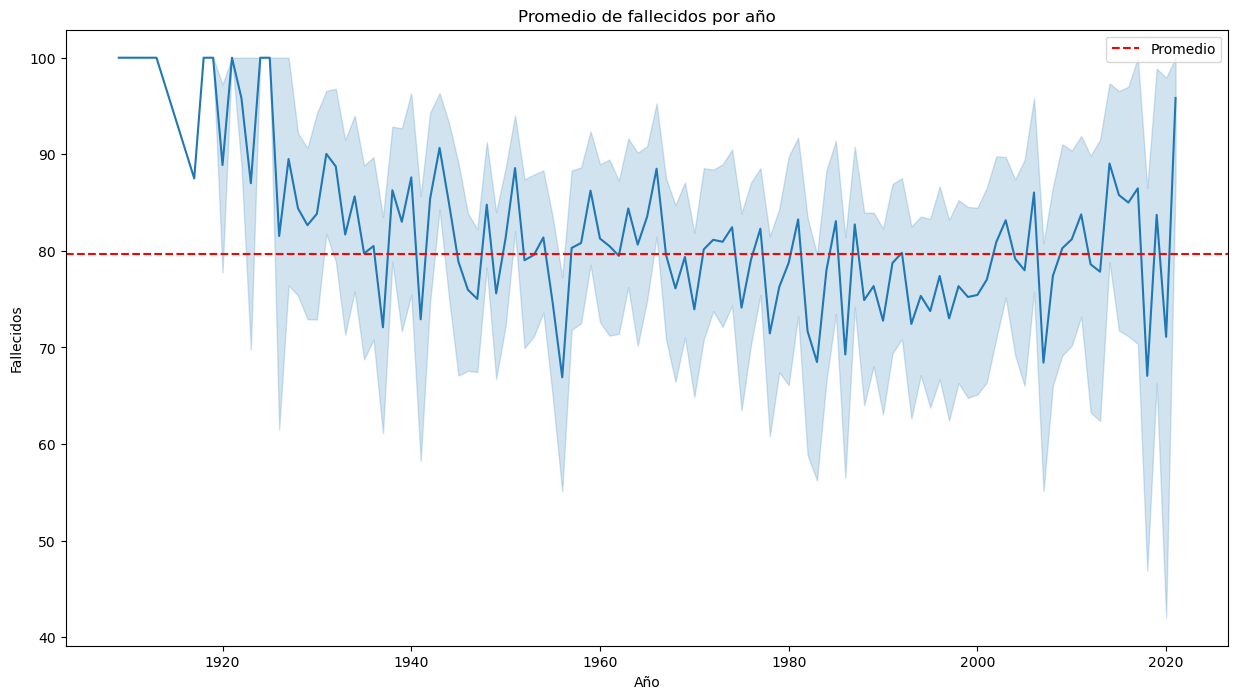

In [21]:
promedio_fallecidos = df_acc_civiles['fallecidos_porcentaje'].mean()


plt.figure(figsize=(15, 8))
sns.lineplot(x='_year', y='fallecidos_porcentaje', data=df_acc_civiles)
plt.axhline(promedio_fallecidos, color='red', linestyle='--', label='Promedio')

plt.xlabel('Año')
plt.ylabel('Fallecidos')
plt.title('Promedio de fallecidos por año')
plt.legend()
plt.show()

* Cantidad de accidentes agrupado por mes 

In [22]:
df = df_acc_civiles['fecha'].dt.month 

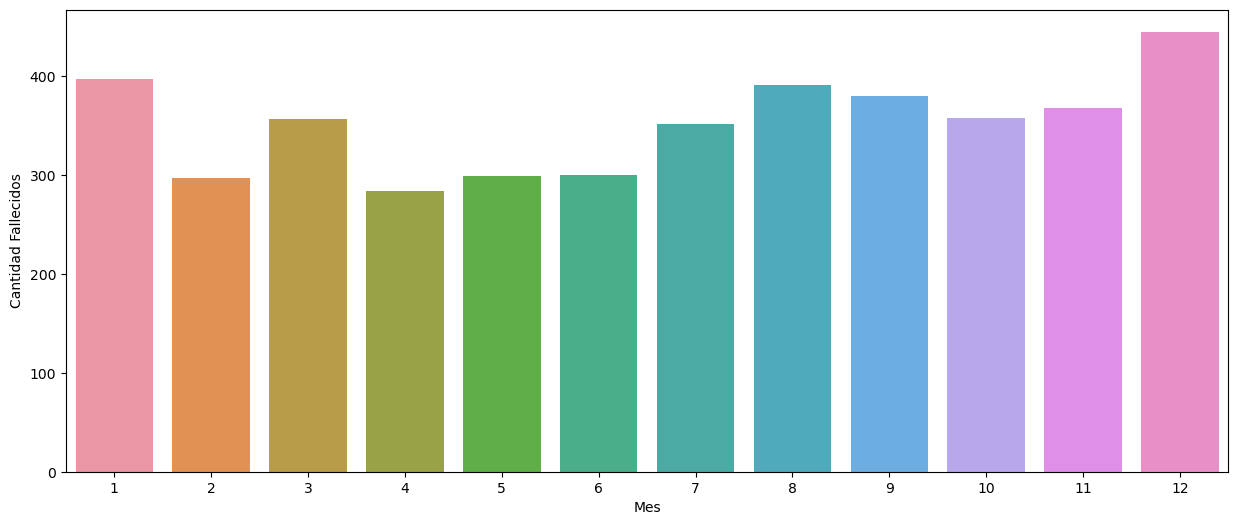

In [24]:
plt.figure(figsize=(15, 6))
sns.countplot(x=df, data=df)
plt.xlabel('Mes')
plt.ylabel('Cantidad Fallecidos')
plt.show()

* cual es la ultima actualizacion de dataset?

In [35]:
# ultima actualizacion de dataset ( Julio 2021 )
df_acc_civiles['fecha'].max()

Timestamp('2021-07-06 00:00:00')

## exporto a .csv

In [117]:
df_acc_civiles.to_csv('acc_civiles_b.csv', index=False)

## dataset segun fabricante

In [26]:
# Boeing 
filtro_Boeing = df_acc_civiles['ac_type'].str.contains('Boeing' ,case=False)
df_Boeing = df_acc_civiles[filtro_Boeing]

In [27]:
# Airbus
filtro_Airbus = df_acc_civiles['ac_type'].str.contains('Airbus' ,case=False)
df_Airbus = df_acc_civiles[filtro_Airbus]

In [28]:
# Antonov
filtro_Antonov = df_acc_civiles['ac_type'].str.contains('Antonov' ,case=False)
df_Antonov = df_acc_civiles[filtro_Antonov]

In [29]:
# Embraer
filtro_Embraer = df_acc_civiles['ac_type'].str.contains('Embraer' ,case=False)
df_Embraer = df_acc_civiles[filtro_Embraer]

In [30]:
# Resto
filtro_Resto = ~df_acc_civiles['ac_type'].str.contains('Embraer|Antonov|Airbus|Boeing' ,case=False)
df_resto = df_acc_civiles[filtro_Resto]

## porcentaje de fallecidos segun fabricante  

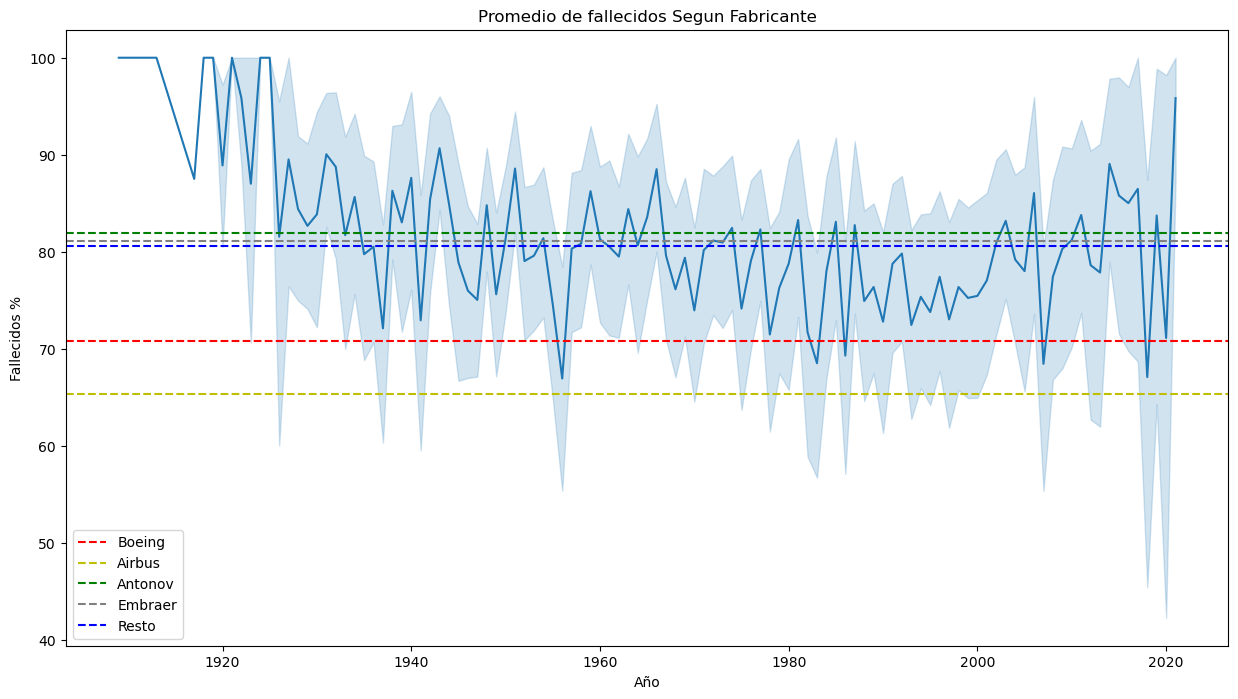

In [31]:
promedio_Boeing = df_Boeing['fallecidos_porcentaje'].mean()
promedio_Airbus = df_Airbus['fallecidos_porcentaje'].mean()
promedio_Antonov = df_Antonov['fallecidos_porcentaje'].mean()
promedio_Embraer = df_Embraer['fallecidos_porcentaje'].mean()
promedio_Otros = df_resto['fallecidos_porcentaje'].mean()


plt.figure(figsize=(15, 8))
sns.lineplot(x='_year', y='fallecidos_porcentaje', data=df_acc_civiles)

plt.axhline(promedio_Boeing, color='red', linestyle='--', label='Boeing')
plt.axhline(promedio_Airbus, color='y', linestyle='--', label='Airbus')
plt.axhline(promedio_Antonov, color='g', linestyle='--', label='Antonov')
plt.axhline(promedio_Embraer, color='grey', linestyle='--', label='Embraer')
plt.axhline(promedio_Otros, color='b', linestyle='--', label='Resto')


plt.xlabel('Año')
plt.ylabel('Fallecidos %')
plt.title('Promedio de fallecidos Segun Fabricante')
plt.legend()
plt.show()

In [57]:
print('Promedio hirtorico')
print('Boeing: ',promedio_Boeing)
print('Airbus: ',promedio_Airbus)
print('Antonov: ',promedio_Antonov)
print('Embraer: ',promedio_Embraer)
print('Resto: ',promedio_Otros)

Promedio hirtorico
Boeing:  70.81291784702546
Airbus:  65.2741304347826
Antonov:  81.87747747747751
Embraer:  81.12120689655173
Resto:  80.6001718794027


* exporto a .csv 

In [51]:
df_Boeing.to_csv('acc_Boeing.csv', index=False)
df_Airbus.to_csv('acc_AirBus.csv', index=False)
df_Antonov.to_csv('acc_Antonov.csv', index=False)
df_Embraer.to_csv('acc_Embraer.csv', index=False)
df_resto.to_csv('acc_resto.csv', index=False)